# **Frequência e Medidas - Challenge**

O objetivo desse aula é que vocês consigam responder algumas perguntas através da análise de dados.

Os dados que deverão ser utilizado nesse script foram baixados do kaggle, e podem ser acessados através do link: https://www.kaggle.com/spscientist/students-performance-in-exams

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas e suas informações pessoais. 

Variáveis:
*   ***gender*** - gênero do aluno
*   ***race/ethnicity*** - raça/etnia dos alunos
*   ***parental level of education*** - grau de escolaridade dos pais
*   ***lunch*** - tipo de almoço
*   ***test preparation course*** - indica se fez curso preparatório
*   ***math score*** - nota na prova de matematica
*   ***reading score*** - nota na prova de leitura
*   ***writing score*** - nota na prova de escrita

Os dados são arquivos em .csv.

**OBS**: Não se esqueça de consultar o material da aula passada para eventuais dúvidas sobre o código que deverá ser utilizado.

**OBS2**: Se possível, responda as perguntas com análise descritiva e gráfica.



### Leia a base de dados e faça uma análise inicial.

Por exemplo, verifique o tamanho da base de dados e o tipo das variáveis.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

In [25]:
dados = pd.read_csv('StudentsPerformance.csv')
dados

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [26]:
dados.shape

(1000, 8)

In [27]:
dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [28]:
dados.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Idenfique as variáveis qualitativas e quantitativas.

In [29]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [30]:
dados.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Alguma variável precisa ser alterada ou criada? Faça as alterações que julgar necessária.

In [31]:
#Não

### Verifique a quantidade de alunos em cada grupo racial/étnico.

In [32]:
dados['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [33]:
dados['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [34]:
dados.groupby(['race/ethnicity'])['race/ethnicity'].count()

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

In [35]:
sorted(dados.groupby(['race/ethnicity'])['race/ethnicity'].count())

[89, 140, 190, 262, 319]

In [36]:
pd.crosstab(index = dados["race/ethnicity"], columns="count").sort_values('count', ascending = False)

col_0,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


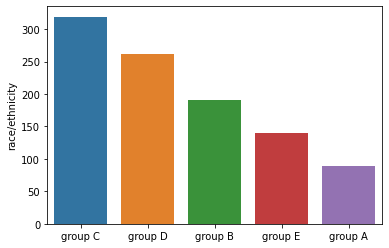

In [39]:
sns.barplot(x=dados['race/ethnicity'].value_counts().index, y=dados['race/ethnicity'].value_counts())

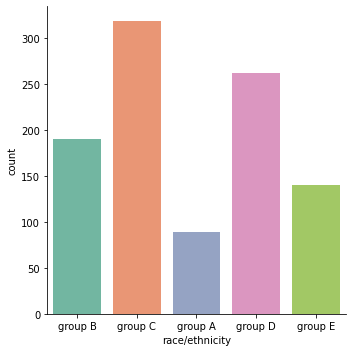

In [40]:
sns.catplot(x="race/ethnicity", kind="count", palette="Set2", data=dados);

### Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

In [41]:
dados['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [42]:
dados['gender'].value_counts().max()

518

In [55]:
dados_1 = pd.crosstab(index = dados["gender"], columns="count").sort_values('count', ascending = False)
dados_1

col_0,count
gender,
female,518
male,482


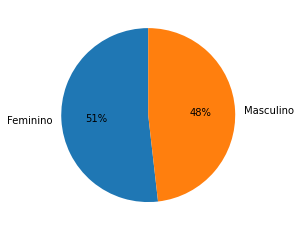

In [60]:
plt.pie([dados_1.loc['female'][0], dados_1.loc['male'][0]], labels = ["Feminino", "Masculino"], startangle=90, autopct='%i%%');

### Analise as notas de matemática dos alunos de forma mais completa possível.

Dica: Identifique o tipo de variável e faça todas análises que você sabe que pode ser aplicado para esse tipo de variável. Por exemplo, se for uma variável quantitativa calcule a média, mediana, quartis, etc. Já se for uma variável qualitativa faça a tabela de fequência, moda, etc.

OBS: Faça também análises gráficas.

### Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais? Faça a mesma análise para as notas de leitura e escrita.

In [61]:
dados['math score'].median()

66.0

In [62]:
dados['math score'].mean()

66.089

In [63]:
dados['math score'].mode()

0    65
dtype: int64

In [65]:
dados['math score'].min()

0

In [67]:
dados['math score'].max()

100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


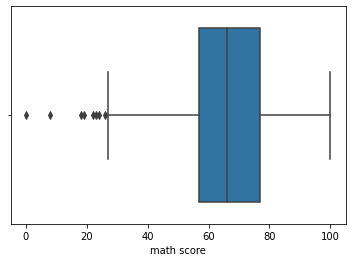

In [68]:
sns.boxplot(dados['math score'])

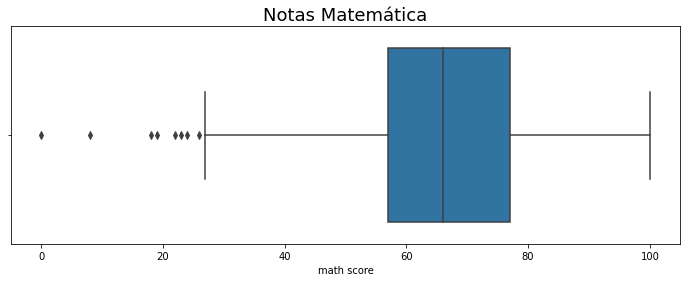

In [64]:
ax = sns.boxplot( x = 'math score', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Notas Matemática', fontsize=18)
ax;

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


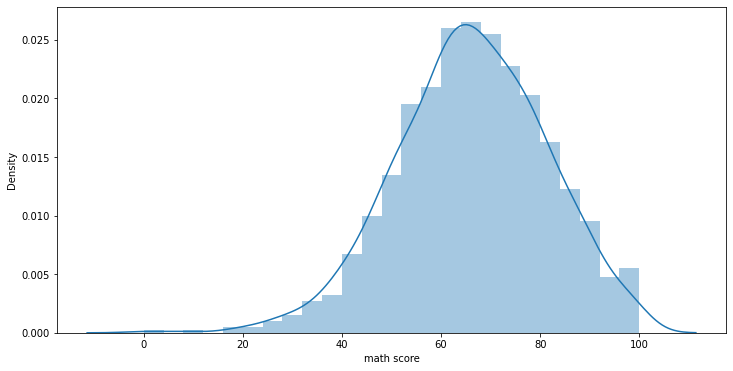

In [66]:
ax = sns.distplot(dados['math score'])
ax.figure.set_size_inches(12, 6)
ax;

In [72]:
dados_2 = dados.groupby('parental level of education')['math score'].mean().round(2)
dados_2

parental level of education
associate's degree    67.88
bachelor's degree     69.39
high school           62.14
master's degree       69.75
some college          67.13
some high school      63.50
Name: math score, dtype: float64

In [73]:
dados.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().round(2)

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.88,70.93,69.90
bachelor's degree,69.39,73.00,73.38
high school,62.14,64.70,62.45
master's degree,69.75,75.37,75.68
some college,67.13,69.46,68.84
some high school,63.50,66.94,64.89


In [75]:
pivot_table = pd.pivot_table(dados, values='math score',  columns=['parental level of education'], aggfunc=np.sum)
pivot_table

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,15070,8188,12179,4115,15171,11366


In [84]:
pivot_table = pd.pivot_table(dados, values='math score',  columns=['parental level of education'], aggfunc=np.mean)
pivot_table

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,67.882883,69.389831,62.137755,69.745763,67.128319,63.497207


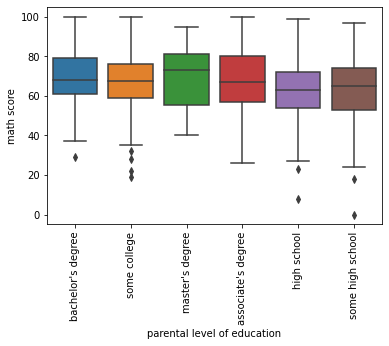

In [80]:
sns.boxplot(x='parental level of education', y = 'math score', data = dados)
plt.xticks(rotation = 90);

In [86]:
data_pivot = dados.pivot(columns = "parental level of education", values = "math score")
data_pivot

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,NaN,72.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,69.0,NaN
2,NaN,NaN,NaN,90.0,NaN,NaN
3,47.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,76.0,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,88.0,NaN,NaN
996,NaN,NaN,62.0,NaN,NaN,NaN
997,NaN,NaN,59.0,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,68.0,NaN


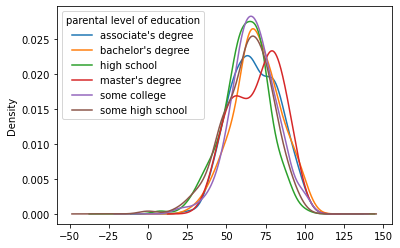

In [89]:
data_pivot.plot.density();

### Verifique gráficamente a relação da nota de leitura e de escrita.

In [90]:
dados.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

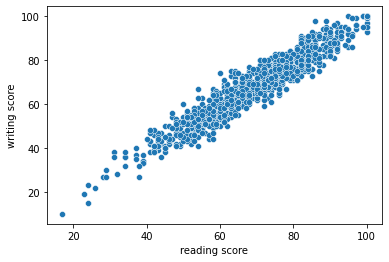

In [94]:
sns.scatterplot(data=dados, x="reading score", y="writing score")
plt.xlabel("reading score")
plt.ylabel("writing score")
plt.show();

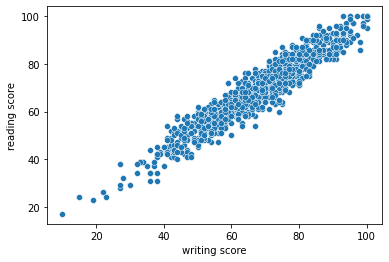

In [95]:
sns.scatterplot(data=dados, y="reading score", x="writing score")
plt.ylabel("reading score")
plt.xlabel("writing score")
plt.show();

In [98]:
covariance = np.cov(dados["reading score"], dados["writing score"])
covariance

array([[213.1656046 , 211.78666066],
       [211.78666066, 230.90799199]])

In [100]:
corr, _ = pearsonr(dados["reading score"], dados["writing score"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.955


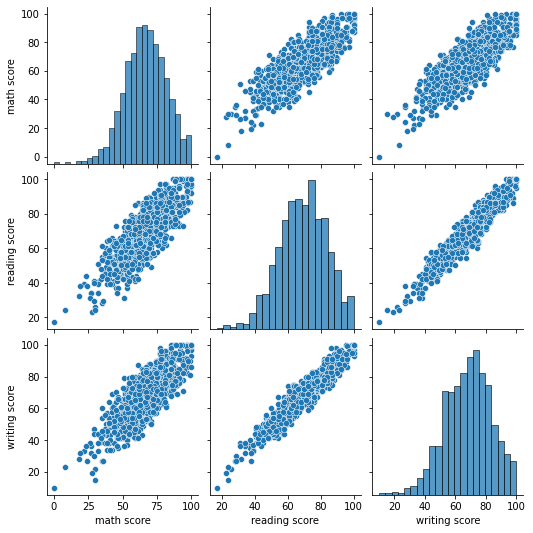

In [102]:
sns.pairplot(dados);

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

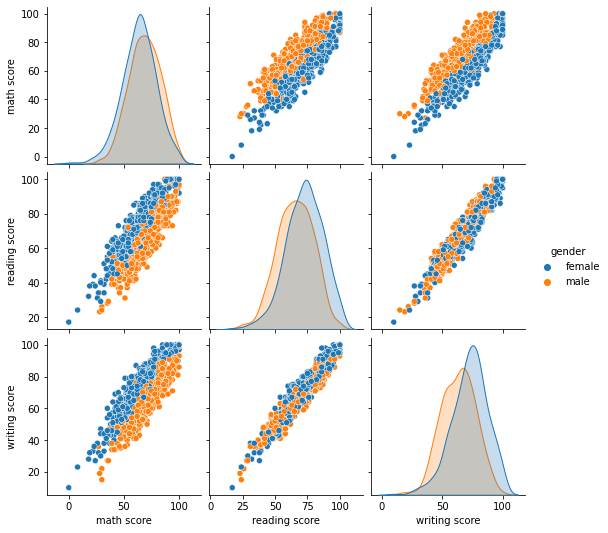

In [103]:
sns.pairplot(dados, hue="gender")

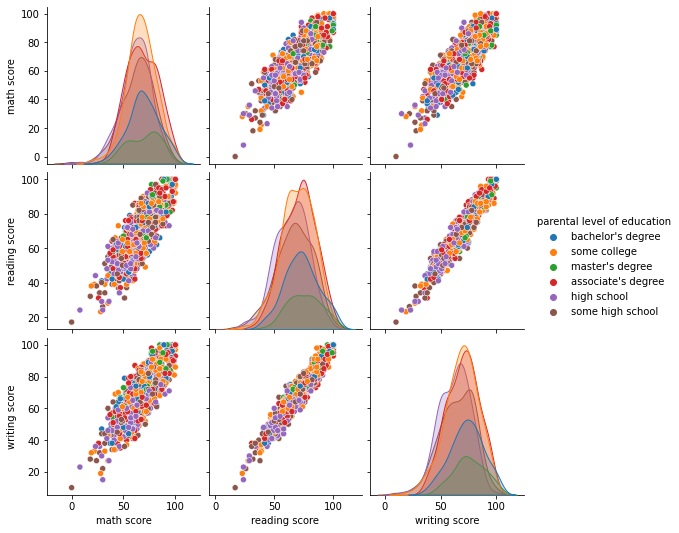

In [105]:
sns.pairplot(dados, hue="parental level of education")